In [2]:
import pandas as pd
import random as rm
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import seaborn as sns

## Cambiamos el nombre de las columnas por nombres que sean mas accesibles


In [3]:
df_con = pd.read_csv("ventas_condones.csv");
df_con.columns = ['year', 'country', 'sales',
       'revenue', 'campaigns',
       'awareness', 'type',
       'contraceptive_rate', 'teen_pregnancy',
       'hiv_prevention', 'online_sales',
       'price', 'male_female',
       'dominance', 'sex_ducation']

In [4]:
df_con.head(10)

,year,country,sales,revenue,campaigns,awareness,type,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price,male_female,dominance,sex_ducation
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69% Male - 39% Female,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50% Male - 33% Female,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46% Male - 54% Female,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49% Male - 57% Female,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40% Male - 29% Female,Trojan,Yes
5,2015,India,1273,4200.754788,No,9.48,Non-Latex,69.16,56.18,60.86,5.07,1.52,73% Male - 48% Female,Kamasutra,No
6,2015,India,1580,4856.165906,No,9.31,Ultra-Thin,40.95,34.12,90.31,23.89,2.31,42% Male - 44% Female,Skyn,Yes
7,2015,India,116,103.446367,No,3.15,Non-Latex,17.97,43.23,54.99,61.79,1.33,58% Male - 29% Female,Skyn,No
8,2015,India,1774,5508.894147,Yes,9.09,Non-Latex,94.18,67.43,79.34,11.33,1.28,72% Male - 28% Female,Trojan,Yes
9,2015,India,127,201.716851,Yes,4.79,Non-Latex,27.39,69.19,59.64,17.67,1.15,48% Male - 57% Female,Trojan,Yes


In [5]:
num_registros = len(df_con)
print(f"El dataset tiene {num_registros} registros")

El dataset tiene 550 registros


In [6]:
print(f"Variables: {df_con.shape[1]}")
print("\nTipos de datos:")
print(df_con.dtypes.value_counts())

Variables: 15

Tipos de datos:
float64    7
object     6
int64      2
Name: count, dtype: int64


## Eliminamos las columnas que no vamos a utilizar

In [7]:
df_con = df_con.drop(columns = ['male_female'])

## Creamos funciones para obtener las columnas numericas y cartegoricas

In [10]:
def getInt(df):
    col_number = [];
    for column in df:
        if(df[column].dtype != 'O' and column != 'year'):
            col_number.append(column)
    return col_number

def getCat(df):
    col_cat = [];
    for column in df:
        if(df[column].dtype == 'O' or column == 'year'):
            col_cat.append(column)
    return col_cat

In [11]:
col_num = getInt(df_con)
col_cat = getCat(df_con)

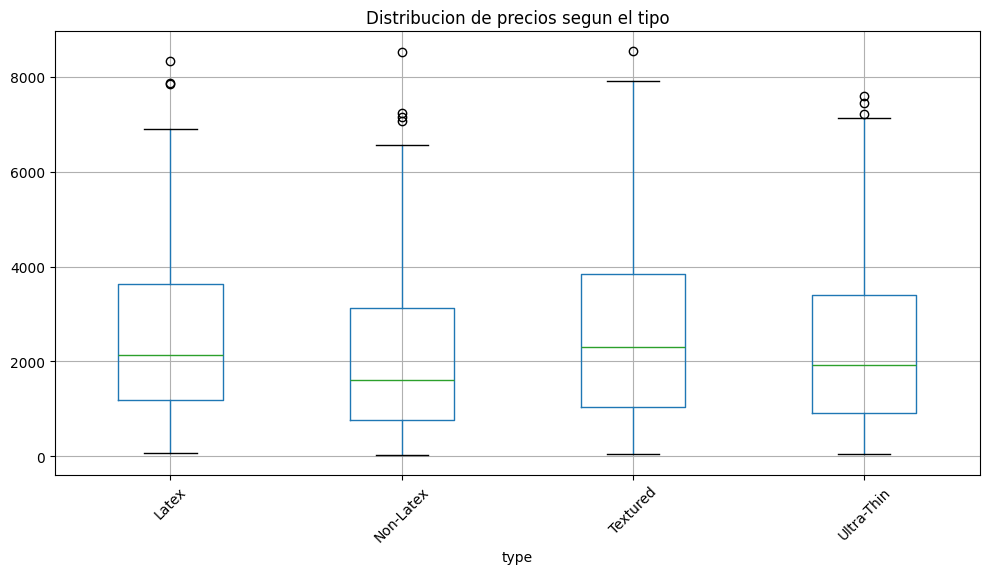

In [12]:
df_con.boxplot(column='revenue', by='type', figsize=(10, 6), rot=45)
plt.title('Distribucion de precios segun el tipo')
plt.suptitle('')
plt.tight_layout()
plt.show()

In [13]:
df_con[col_num].describe()

,sales,revenue,awareness,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,1217.850909,2460.104428,6.248382,54.625527,34.780055,62.049836,36.902309,1.360891
std,707.861532,1908.028885,2.393678,22.865826,19.778428,21.341931,19.256040,0.664664
min,51.000000,34.656206,2.010000,15.020000,2.020000,25.070000,5.010000,0.200000
25%,599.750000,947.550178,4.065000,34.775000,17.532500,43.860000,19.565000,0.782500
50%,1160.000000,2002.374241,6.435000,53.920000,34.705000,63.125000,35.505000,1.390000
75%,1846.000000,3593.351620,8.432500,75.747500,50.787500,79.990000,52.917500,1.927500
max,2500.000000,8536.163259,9.980000,94.970000,69.890000,98.840000,69.960000,2.490000


## Eliminamos valores atipicos

In [14]:
def getValuesQR(columns, df):
    dic_qr = { "columns" : [], "atp_sup" : [], "atp_inf" : []}
    for column in columns: 
        data = df[column].to_list()
        data_serie = pd.Series(data)

        Q1 = data_serie.quantile(0.25)
        Q3 = data_serie.quantile(0.75)

        IQR = Q3 - Q1

        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        atp_sup = df[column].loc[df[column] > upper_bound].count()
        atp_inf = df[column].loc[df[column] < lower_bound].count()
        
        dic_qr["columns"].append(column)
        dic_qr["atp_sup"].append(atp_sup)
        dic_qr["atp_inf"].append(atp_inf)

    return dic_qr

In [15]:
pd_con_out = pd.DataFrame(getValuesQR(col_num, df_con))
pd_con_out

,columns,atp_sup,atp_inf
0,sales,0,0
1,revenue,8,0
2,awareness,0,0
3,contraceptive_rate,0,0
4,teen_pregnancy,0,0
5,hiv_prevention,0,0
6,online_sales,0,0
7,price,0,0


## Obtenemos las probabilidades categoricas

In [16]:
def getProb(cats, df):
    prob_index = {}
    index = 0
    for cat in cats:
        array_prob = [[],[]]
        vals = df_con[cat].drop_duplicates().to_list()
        for val in vals:
            array_prob[0].append(val)
            array_prob[1].append(df_con[cat].loc[df_con[cat] == val].count()/df_con[cat].count())
        prob_index[cat] = array_prob
    return prob_index

In [17]:
probs = getProb(col_cat, df_con)
probs

{'year': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
  [np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091),
   np.float64(0.09090909090909091)]],
 'country': [['USA',
   'India',
   'UK',
   'Brazil',
   'Germany',
   'South Africa',
   'China',
   'Japan',
   'France',
   'Australia'],
  [np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1)]],
 'campaigns': [['No', 'Yes'],
  [np.float64(0.5254545454545455), np.float64(0.47454545454545455)]],
 'type': [['Latex', 'Ultra-Thin', 'Non-Latex', 'Textured'],
  [np.float64(0.2290

## Obtenemos los valores maximos, minimos, media, mediana... de los valores numericos

In [19]:
def getDic(columns, df):
    dic = {}
    for column in columns:
        dic[column] = {}
        dic[column]["min"] = df[column].min()
        dic[column]["max"] = df[column].max()
        dic[column]["mean"] = df[column].mean()
        dic[column]["std"] = df[column].std()
    return dic

In [20]:
pd_tp = pd_con_out.sort_values(by="atp_sup", ascending=False)
dic_tp = getDic(pd_tp["columns"].to_list(), df_con)
dic_tp

{'revenue': {'min': np.float64(34.65620552035023),
  'max': np.float64(8536.163259488441),
  'mean': np.float64(2460.104428197126),
  'std': np.float64(1908.028884948079)},
 'sales': {'min': np.int64(51),
  'max': np.int64(2500),
  'mean': np.float64(1217.850909090909),
  'std': np.float64(707.861532072138)},
 'awareness': {'min': np.float64(2.01),
  'max': np.float64(9.98),
  'mean': np.float64(6.2483818181818185),
  'std': np.float64(2.3936781719616462)},
 'contraceptive_rate': {'min': np.float64(15.02),
  'max': np.float64(94.97),
  'mean': np.float64(54.625527272727275),
  'std': np.float64(22.865826228285943)},
 'teen_pregnancy': {'min': np.float64(2.02),
  'max': np.float64(69.89),
  'mean': np.float64(34.78005454545454),
  'std': np.float64(19.77842825461327)},
 'hiv_prevention': {'min': np.float64(25.07),
  'max': np.float64(98.84),
  'mean': np.float64(62.04983636363636),
  'std': np.float64(21.341931433536978)},
 'online_sales': {'min': np.float64(5.01),
  'max': np.float64(6

## Crea las columnas a simular

In [21]:
def returnDic_num (registrosSimular, df, size):
    d_r = {}
    for key in registrosSimular.keys():

        min_val = registrosSimular[key]["min"]
        max_val = registrosSimular[key]["max"]
        
        if key == 'year':
            values = [rm.randint(min_val, max_val) for _ in range(size)]
        else:
            media = registrosSimular[key]["mean"]
            desv_std = registrosSimular[key]["std"]
    
            a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    
            values = truncnorm.rvs(a, b, media, desv_std, size)
        
        d_r[key] = values

    return d_r

def returnDic_cat (registrosSimular, size):
    d_r = {}
    for key in registrosSimular.keys():

        d_r[key] = np.random.choice(registrosSimular[key][0], size, registrosSimular[key][0])

    return d_r


In [22]:
size = 100000

registrosSimular_cat = probs
simulacion_cat = returnDic_cat(registrosSimular_cat, size);

registrosSimular_num = dic_tp
simulacion_num = returnDic_num(registrosSimular_num, df_con, size)

simulacion_cat.update(simulacion_num)




In [23]:
simulacion = pd.DataFrame(simulacion_cat)

## Comparacion de datos numericos

In [24]:
simulacion.describe()

,year,revenue,sales,awareness,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2019.983750,2828.961552,1239.411065,6.151117,54.801985,35.119252,61.990954,37.100258,1.354691
std,3.160545,1597.211558,577.223541,1.898244,18.702881,15.973748,17.380803,15.426661,0.538927
min,2015.000000,34.726177,51.097073,2.010149,15.024571,2.022878,25.071445,5.010947,0.200254
25%,2017.000000,1594.080663,804.403551,4.730725,40.906377,23.084171,48.977237,25.478219,0.951185
50%,2020.000000,2696.501837,1229.283924,6.182100,54.797407,34.979609,61.973990,37.020744,1.357424
75%,2023.000000,3892.479311,1669.242986,7.604700,68.781451,47.034903,74.980036,48.667759,1.759443
max,2025.000000,8533.966262,2499.977170,9.979947,94.969828,69.889294,98.838579,69.958382,2.489900


In [25]:
df_con.describe()

,year,sales,revenue,awareness,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2020.000000,1217.850909,2460.104428,6.248382,54.625527,34.780055,62.049836,36.902309,1.360891
std,3.165156,707.861532,1908.028885,2.393678,22.865826,19.778428,21.341931,19.256040,0.664664
min,2015.000000,51.000000,34.656206,2.010000,15.020000,2.020000,25.070000,5.010000,0.200000
25%,2017.000000,599.750000,947.550178,4.065000,34.775000,17.532500,43.860000,19.565000,0.782500
50%,2020.000000,1160.000000,2002.374241,6.435000,53.920000,34.705000,63.125000,35.505000,1.390000
75%,2023.000000,1846.000000,3593.351620,8.432500,75.747500,50.787500,79.990000,52.917500,1.927500
max,2025.000000,2500.000000,8536.163259,9.980000,94.970000,69.890000,98.840000,69.960000,2.490000


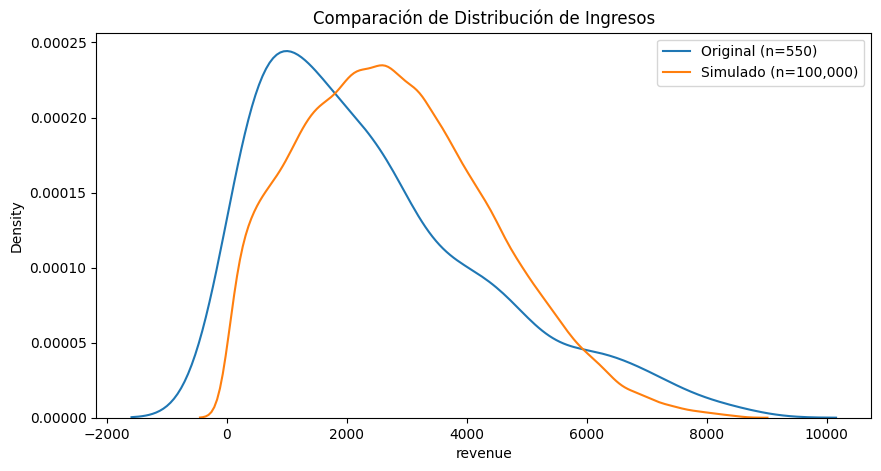

In [26]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_con['revenue'], label='Original (n=550)')
sns.kdeplot(simulacion['revenue'], label='Simulado (n=100,000)')
plt.title('Comparación de Distribución de Ingresos')
plt.legend()